# $ \text{Т.2} $

$$ \text{Случайная величина имеет экспоненциальный закон распределения:} $$

$$ p(x) = \begin{cases}
  e^{-x}, & x \geq 0, \\
  0, &  x < 0
\end{cases} $$

In [1]:
from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.text import Text

import scipy as sp
from seaborn import boxplot as boxpolt
import numpy as np
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator

console = Console()
table = Table()

## $ \text{0) Сгенерировать выборку объёма } n = 25. $

In [ ]:
def p(x: float) -> float:
    """Закон распределения."""
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    """Функция распределения."""
    return (1 - np.exp(-x)) if x >= 0 else 0

def InverseF(y: float) -> float:
    """Обратная к функции распределения."""
    return -np.log(1 - y)

# Размер выборки
N = 25

In [3]:
rng = np.random.default_rng()
random_numbers = rng.random(size=N)

# Выборка
sample = np.array([InverseF(y) for y in random_numbers])

# Вариационный ряд
order_statistics = sorted(sample)

In [4]:
table.add_column(header="Выборка", justify="center")
table.add_column(header="Вариац. ряд", justify="center")

for s, o in zip(sample, order_statistics):
    table.add_row(f"{s:.7f}", f"{o:.7f}")

console.print(table)

┏━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃  Выборка  ┃ Вариац. ряд ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ 1.9098155 │  0.0011126  │
│ 0.6244902 │  0.0274948  │
│ 0.6612720 │  0.1336203  │
│ 0.0274948 │  0.1816522  │
│ 0.2102314 │  0.2102314  │
│ 2.0964274 │  0.2589058  │
│ 1.8416157 │  0.3071913  │
│ 0.8928762 │  0.3764610  │
│ 0.3071913 │  0.4606877  │
│ 0.1816522 │  0.6244902  │
│ 0.6486945 │  0.6486945  │
│ 2.2080190 │  0.6612720  │
│ 0.1336203 │  0.6694291  │
│ 0.2589058 │  0.7805849  │
│ 0.7805849 │  0.8591258  │
│ 0.0011126 │  0.8928762  │
│ 3.2440752 │  1.1503389  │
│ 0.4606877 │  1.3726175  │
│ 1.9638784 │  1.8416157  │
│ 0.6694291 │  1.9098155  │
│ 0.8591258 │  1.9638784  │
│ 2.4159344 │  2.0964274  │
│ 1.3726175 │  2.2080190  │
│ 0.3764610 │  2.4159344  │
│ 1.1503389 │  3.2440752  │
└───────────┴─────────────┘

## $ \text{1) Определить по выборке} \\ \text{ моду,} \\ \text{ медиану,} \\ \text{ размах,} \\ \text{ оценку коэффициента асимметрии.} $

In [5]:
def MuK(k: int, sample: list) -> float:
    return np.sum([(x_i - np.mean(sample))**k for x_i in sample]) / len(sample)

In [6]:
# Мода
mode = order_statistics[max([(order_statistics.count(order_statistics[i]), i) for i in range(len(order_statistics))])[-1]] if len(order_statistics) != len(set(order_statistics)) else "[вся выборка]"

# Медиана
median = np.median(order_statistics)

# Размах
range_val = np.ptp(order_statistics)

# Коэф. асимметрии
gamma = MuK(3, order_statistics) / MuK(2, order_statistics) ** 1.5

In [7]:
titles = ["Мода", "Медиана", "Размах", "Коэф. асимметрии"]
values = [mode, median, range_val, gamma]

panels = [Panel(Text(str(value), style="bold"), title=title) for title, value in zip(titles, values)]

console.print("Оценки:\n", *panels, justify="left")

Оценки:                                                                                                            
                                                                                                                   
╭──── Мода ─────╮                                                                                                  
│ [вся выборка] │                                                                                                  
╰───────────────╯                                                                                                  
╭───── Медиана ──────╮                                                                                             
│ 0.6694291094277786 │                                                                                             
╰────────────────────╯                                                                                             
╭────── Размах ──────╮                                                                                             
│ 3.2429625505336164 │                                                                                             
╰────────────────────╯                                                                                             
╭─ Коэф. асимметрии ─╮                                                                                             
│ 0.8687887396373963 │                                                                                             
╰────────────────────╯

## $ \text{2) Построить эмпирическую функцию распределения,} \\ \text{ гистограмму и boxplot.} $

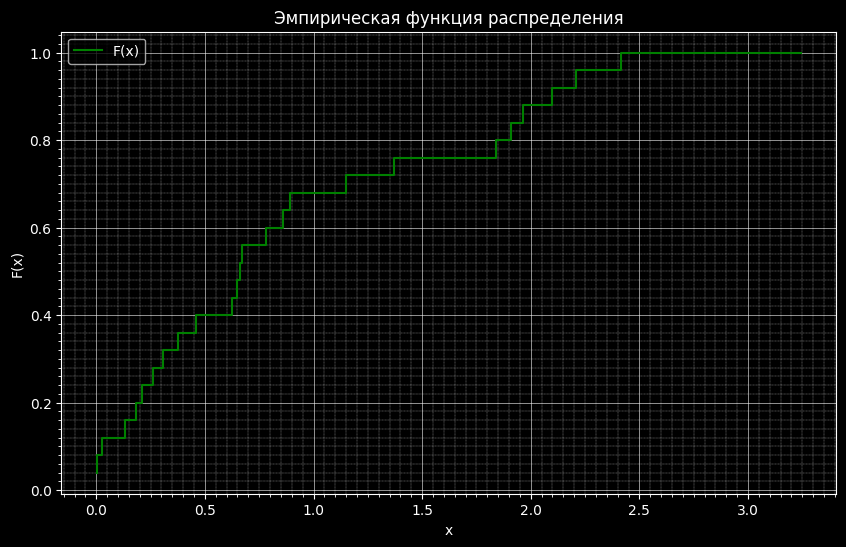

In [8]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Эмпирическая функция распределения")
axs.set_xlabel("x")
axs.set_ylabel("F(x)")

axs.step(order_statistics,
         np.arange(1, N + 1) / N,
         color="green",
         label="F(x)")

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

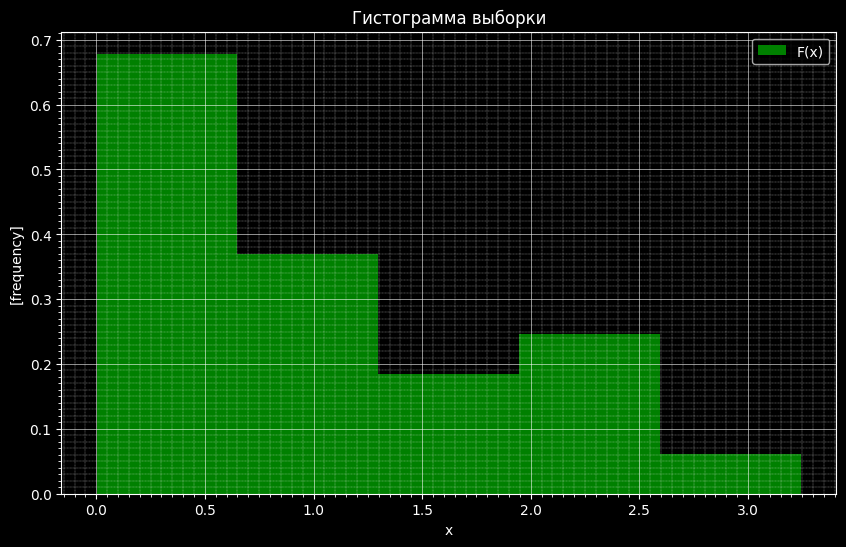

In [9]:
_, axs = polt.subplots(1, 1, figsize=(10, 6))

axs.set_title("Гистограмма выборки")
axs.set_xlabel("x")
axs.set_ylabel("[frequency]")

axs.hist(order_statistics,
         bins=int(1 + np.log2(N)),
         color='green',
         label="F(x)",
         density=True)

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

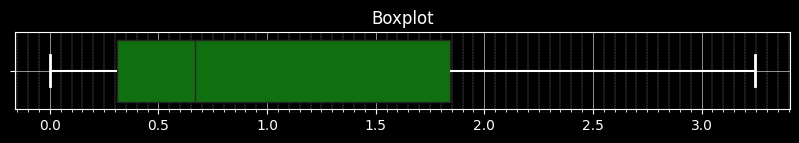

In [10]:
_, axs = polt.subplots(1, 1, figsize=(10, 1))

axs.set_title("Boxplot")

boxpolt(x=order_statistics,
        color="green",
        whiskerprops={"color": "white", "linewidth": 1.5},
        capprops={"color": "white", "linewidth": 2},
        flierprops={'markerfacecolor': 'white', 'markersize': 8})

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.show()

## $ \text{3) Сравнить оценку плотности распределения} \\ \text{ ср. арифм. элементов выборки,} \\ \text{ полученную с помощью ЦПТ,} \\ \text{ с bootstrap-оценкой этой плотности.} $

![image](./task_2_c.png)

In [ ]:
# Количество повторений bootstrap
bootstrap_iteration = 1000

# Параметры нормального распределения
mu = 1
sigma = 1/5 # (корень из 1/25)

In [12]:
bootstrap_samples = sample[np.random.choice(len(sample), size=(bootstrap_iteration, len(sample)))]

# Средние значения для каждой выборки bootstrap
bootstrap_means = np.mean(bootstrap_samples, axis=1)

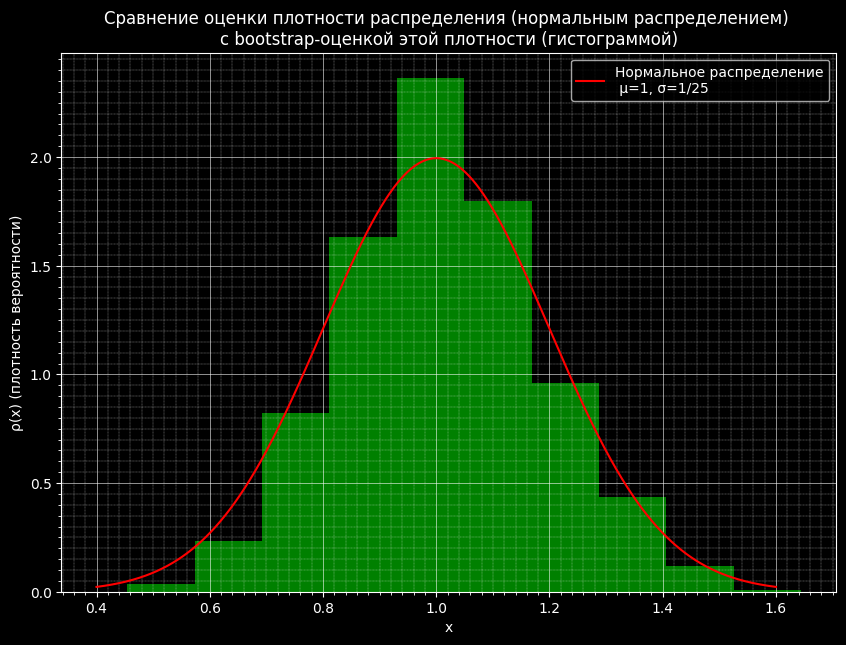

In [13]:
_, axs = polt.subplots(1, 1, figsize=(10, 7))

axs.set_title("Сравнение оценки плотности распределения (нормальным распределением) \nс bootstrap-оценкой этой плотности (гистограммой)")
axs.set_xlabel("x")
axs.set_ylabel("ρ(x) (плотность вероятности)")

axs.hist(bootstrap_means,
          bins=1+int(np.log2(bootstrap_iteration)),
          color='green',
          density=True)

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
axs.plot(x,
         sp.stats.norm.pdf(x, mu, sigma),
         label="Нормальное распределение\n μ=1, σ²=1/25",
         color='red')

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

## $ \text{4) Найти bootstrap-оценку плотности распределения} \\ \text{ коэффициента асимметрии} \\ \text{ и оценить вероятность того,} \\ \text{ что коэффициент асимметрии будет меньше 1.} $

In [14]:
bootstrap_skewness = []

for _ in range(bootstrap_iteration):
    bootstrap_sample = np.random.choice(sample, size=len(sample))
    bootstrap_skewness.append(MuK(3, bootstrap_sample.tolist())/(MuK(2, bootstrap_sample.tolist()) ** 1.5))

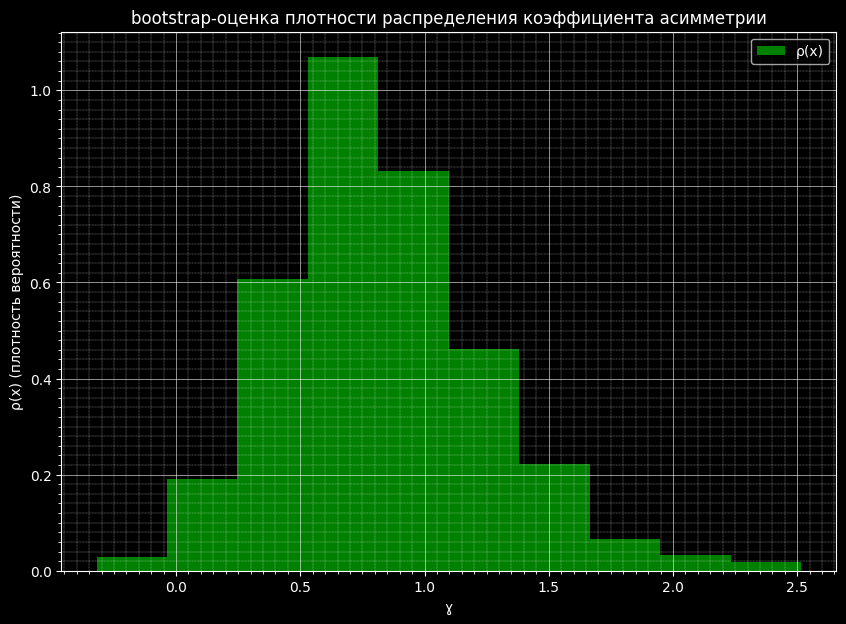

In [15]:
_, axs = polt.subplots(1, 1, figsize=(10, 7))

axs.set_title("bootstrap-оценка плотности распределения коэффициента асимметрии")
axs.set_xlabel("ɣ")
axs.set_ylabel("ρ(x) (плотность вероятности)")

axs.hist(bootstrap_skewness,
          bins=1 + int(np.log2(bootstrap_iteration)),
          color='green',
          label="ρ(x)",
          density=True)

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()

In [16]:
prob_skew_less_than_1 = np.sum([1 if bootstrap_skewness[i] < 1 else 0 for i in range(bootstrap_iteration)])/bootstrap_iteration

console.print(Panel(Text(str(prob_skew_less_than_1)),
              title="Оценка вероятности того, что коэффициент асимметрии будет меньше 1"),
              justify="left")


╭─ Оценка вероятности того, что коэффициент асимметрии будет меньше 1 ─╮                                           
│ 0.701                                                                │                                           
╰──────────────────────────────────────────────────────────────────────╯

## $ \text{5) Сравнить плотность распределения}\\ \text{ медианы выборки} \\ \text{ с bootstrap-оценкой этой плотности.} $

In [17]:
def Kappa(x):
    k = N // 2 + 1
    return N * p(x) * sp.special.comb(N - 1, k - 1) * ((1 - F(x)) ** (N - k)) * (F(x) ** (k - 1))

In [18]:
bootstrap_medians = []

for _ in range(bootstrap_iteration):
    bootstrap_medians.append(np.median(np.random.choice(sample,
                                                        size=len(sample),
                                                        replace=True)))

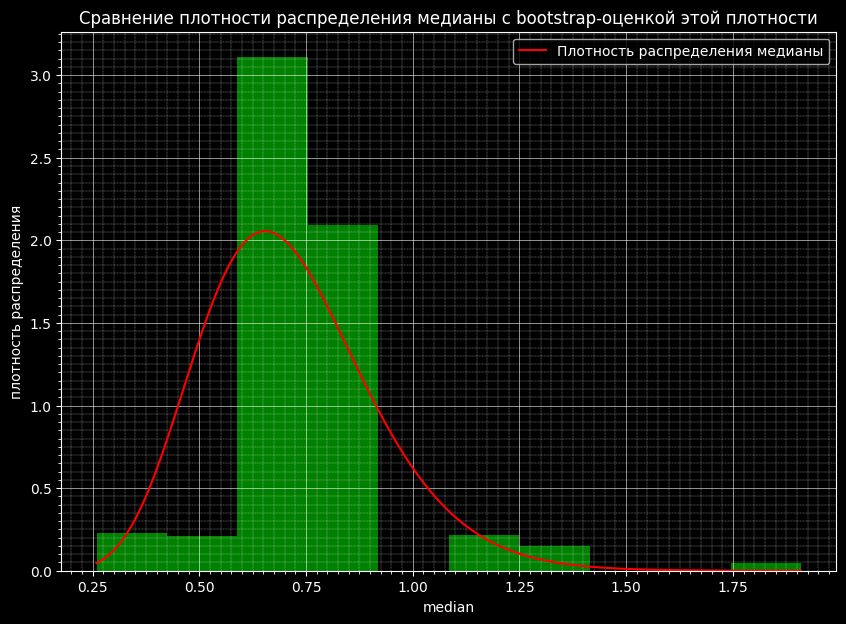

In [19]:
_, axs = polt.subplots(1, 1, figsize=(10, 7))

axs.set_title("Сравнение плотности распределения медианы с bootstrap-оценкой этой плотности")
axs.set_xlabel("median")
axs.set_ylabel("плотность распределения")

axs.hist(bootstrap_medians,
         bins=int(1 + np.log2(bootstrap_iteration)),
         color="green",
         density=True)

x = np.linspace(min(bootstrap_medians),
                max(bootstrap_medians),
                bootstrap_iteration)
axs.plot(x,
         [Kappa(x_i) for x_i in x],
         label="Плотность распределения медианы",
         color = "red")

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which='minor', linestyle='--', linewidth=0.2)
polt.grid(which='major', linewidth=0.4)

polt.legend()
polt.show()